In [1]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sb
from collections import Counter
import matplotlib.pyplot as plt


Estimated number of clusters: 5
Estimated number of noise points: 24
Silhouette Coefficient: 0.247


Text(0.5,1,'DBSCAN')

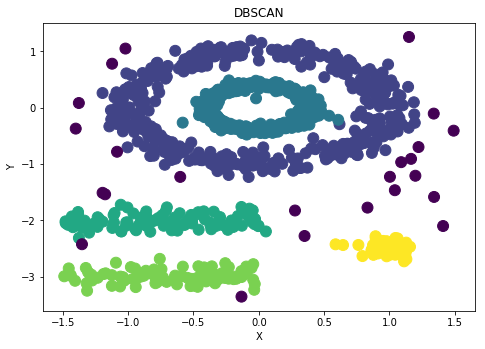

In [3]:
df = pd.read_excel('galaxy.xlsx')
model = DBSCAN(eps=0.2,min_samples=10).fit(df)
outliers_df = pd.DataFrame(df)
fig = plt.figure()

ax = fig.add_axes([.1,.1,1,1])

colors = model.labels_

core_samples_mask = np.zeros_like(model.labels_, dtype=bool)
core_samples_mask[model.core_sample_indices_] = True
labels = model.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(df, labels))

ax.scatter(df.iloc[:, 0],df.iloc[:, 1], c=colors, s=120)

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.title('DBSCAN')